In [3]:
figdir = '/data/Phillippy/projects/HG002_Masseq/PDTG-project/scripts/isoseq-analysis/plts'

In [4]:
import pandas as pd
import plotly.express as px

In [58]:
sqanti = "/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2309/isoquant_extended/hg002.chm13.flnc_extended_sqanti3_rescued_classification.txt"

In [59]:
tab = pd.read_csv(sqanti, sep = '\t' , header=0)

In [60]:
tab.head(3)

,isoform,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,ref_exons,...,seq_A_downstream_TTS,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS
0,HHV4_unassigned_transcript_11,NC_007605.1,+,1803,19,full-splice_match,NaN,HHV4_unassigned_transcript_11,1803.0,19.0,...,TTGACACGCCTGTCATTCTA,NaN,False,NaN,False,AATAAA,-25.0,True,NaN,NaN
1,HHV4_unassigned_transcript_129,NC_007605.1,+,2150,4,full-splice_match,NaN,HHV4_unassigned_transcript_129,2150.0,4.0,...,ATTAAAATCTCTATGTCATT,NaN,False,NaN,False,AATAAA,-21.0,True,MAARVPIEELRELRHLRGHCREDVVGVQRSGRPLCLRPPRARDRAL...,NaN
2,HHV4_unassigned_transcript_135,NC_007605.1,+,2008,9,full-splice_match,NaN,HHV4_unassigned_transcript_135,2008.0,9.0,...,AAATGTGGTTTGTATGGCTA,NaN,False,NaN,False,AATAAA,-11.0,True,MFLACVLVLIVDAVLQLSPLLGAVTVVSMTLLLLAFVLWLSSPGGL...,NaN


In [61]:
tab = tab[['isoform','structural_category']]

In [62]:
swiss = "/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2309/blast/swissprot.pblast.txt"

In [63]:
swiss = pd.read_csv(swiss, sep = '\t' , header=0)

In [64]:
swiss = swiss[['qseqid','pident']]
swiss.columns = ['isoform' , 'ORF identity']

In [65]:
df = swiss.merge(tab, on = 'isoform')

In [66]:
df.head(3)

,isoform,ORF identity,structural_category
0,HHV4_unassigned_transcript_135,100.0,full-splice_match
1,HHV4_unassigned_transcript_136,100.0,full-splice_match
2,HHV4_unassigned_transcript_139,100.0,full-splice_match


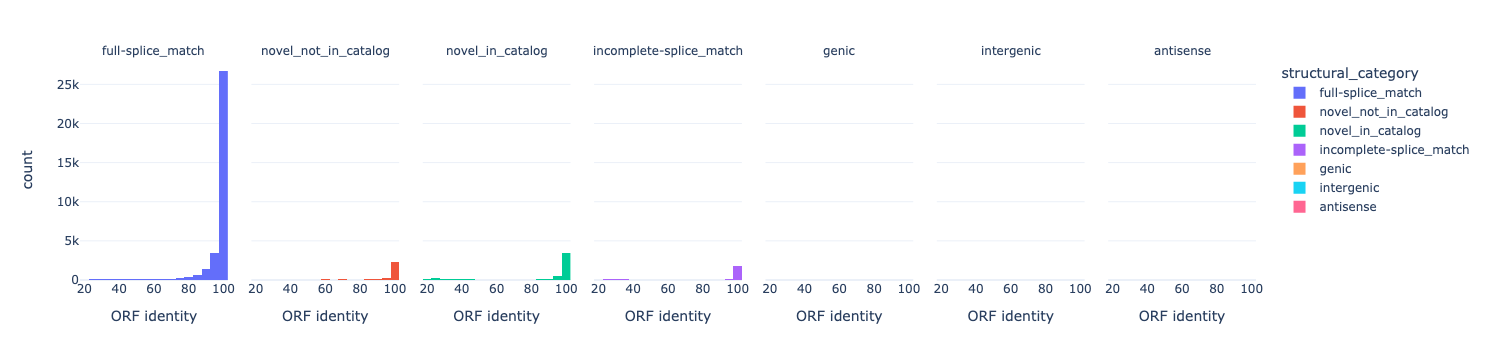

In [67]:
import plotly.express as px

fig = px.histogram(df, x="ORF identity", nbins=30,
                   color="structural_category",
                   facet_col="structural_category",
                   height=300, width = 1500,
                  template = "plotly_white")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))


fig.show()

In [52]:
fig.write_image(figdir + "/structure_swiss_histogram.svg")